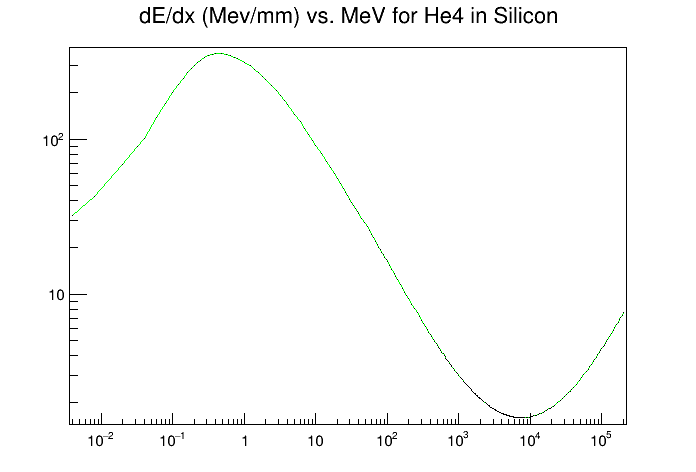

In [1]:
%jsroot on //读取4He在Si中的能损信息
ifstream in_he4("He4elossinSi.txt");
string ss_he4;
double a_he4, b_he4, e_he4, dedx_he4;
auto *g_he4 = new TGraph;
TCanvas c_he4;
if(!in_he4.is_open())
{
    cout<<"Data File about He4 does noet exist!"<<endl;
    return 0;
}
getline(in_he4,ss_he4);
int i_he4=0;
while(!in_he4.eof())
{
    in_he4>>a_he4>>b_he4>>e_he4>>dedx_he4>>a_he4>>b_he4>>a_he4>>b_he4>>a_he4>>b_he4>>a_he4>>b_he4;
    g_he4->SetPoint(i_he4,e_he4*4,dedx_he4*1000);//number,MeV,MeV/mm
    i_he4++;
}
g_he4->SetTitle("dE/dx (Mev/mm) vs. MeV for He4 in Silicon");
g_he4->SetLineColor(kGreen);
g_he4->Draw();
gPad->SetLogy();
gPad->SetLogx();
c_he4.Draw();
in_he4.close();

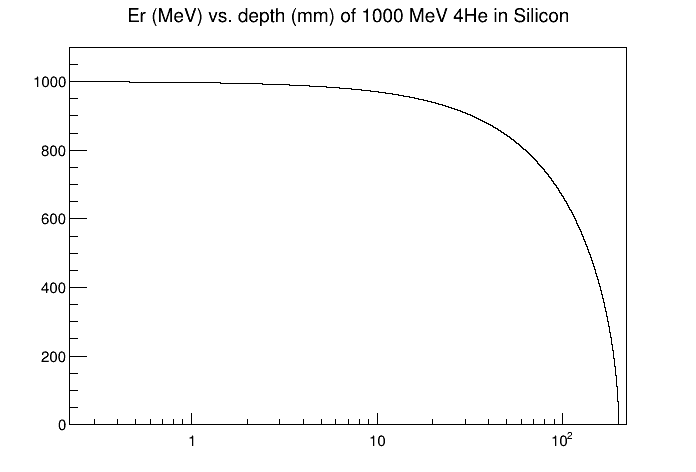

depth:200.532mm


In [2]:
%jsroot on;//本行代码1000 MeV的4He粒子在Si不同厚度时的剩余能量(Er vs depth--e=f(x)）；
Double_t er_he4 = 1000.;//MeV：1000 MeV 4he；
Double_t dx_he4 = 0.001;//mm：穿透每个切片的厚度；
Double_t x_he4=0.0;//mm：穿透总厚度
auto * depth_he4 = new TGraph;
TCanvas c_depth_he4;
Int_t j_he4 =0;
while(er_he4>0)
{
    depth_he4->SetPoint(j_he4,x_he4,er_he4);//写入穿透该切片前位置与dedx
    j_he4++;//下一切片；
    x_he4=j_he4*dx_he4;//穿透该切片后位置；
    er_he4=er_he4-dx_he4*g_he4->Eval(er_he4);//穿透切片后剩余能量；
}
depth_he4->SetPoint(j_he4,x_he4,0);//写入12C能量全部沉积后的位置与dedx；
depth_he4->SetTitle("Er (MeV) vs. depth (mm) of 1000 MeV 4He in Silicon");
depth_he4->SetLineColor(kRed);
depth_he4->Draw();
//gPad->SetLogy();
gPad->SetLogx();
c_depth_he4.Draw();
cout<<"depth:"<<x_he4<<"mm"<<endl;

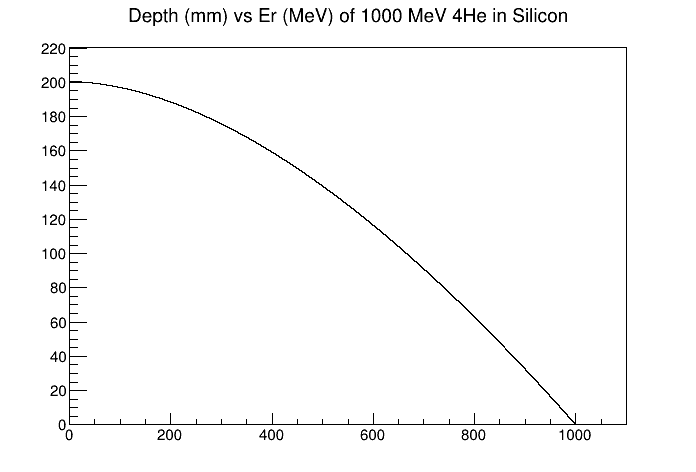

Depth of 1000 MeV 4He in Sillicon:200.532mm
Depth of 5.486 MeV 4He in Sillicon:0.0277423mm
Depth of 10 MeV 4He in Sillicon:0.0692679mm
Depth of 100 MeV 4He in Sillicon:3.48517mm
Depth of 200 MeV 4He in Sillicon:12.0104mm


In [3]:
%jsroot on;//将e=f(x)变为x=f(e)；
Double_t er= 1000.;//MeV：1000 MeV 4he；
Double_t dx = 0.001;//mm：穿透每个切片的厚度；ps:dx间隔直接影响计算结果；
Double_t x=0.0;//mm：穿透总厚度
auto * depthvse = new TGraph;
TCanvas c_depthvse;
Int_t j =0;
while(er>0)
{
    depthvse->SetPoint(j,er,x);
    j++;
    x=x+dx;//穿透该切片后位置；
    er=depth_he4->Eval(x);//穿透切片后剩余能量；
}
depthvse->SetPoint(j,0,x);
depthvse->SetTitle("Depth (mm) vs Er (MeV) of 1000 MeV 4He in Silicon");
depthvse->SetLineColor(kRed);
depthvse->Draw();
c_depthvse.Draw();
cout<<"Depth of 1000 MeV 4He in Sillicon:"<<depthvse->Eval(0)<<"mm"<<endl;
cout<<"Depth of 5.486 MeV 4He in Sillicon:"<<depthvse->Eval(0)-depthvse->Eval(5.486)<<"mm"<<endl;
cout<<"Depth of 10 MeV 4He in Sillicon:"<<depthvse->Eval(0)-depthvse->Eval(10)<<"mm"<<endl;
cout<<"Depth of 100 MeV 4He in Sillicon:"<<depthvse->Eval(0)-depthvse->Eval(100)<<"mm"<<endl;
cout<<"Depth of 200 MeV 4He in Sillicon:"<<depthvse->Eval(0)-depthvse->Eval(200)<<"mm"<<endl;

In [4]:
!jupyter nbconvert 2.he4depth.ipynb --to html

[NbConvertApp] Converting notebook 2.he4depth.ipynb to html


